In [2]:
import scanpy as sc
import omicverse as ov
import scvelo as scv

ov.ov_plot_set()



   ____            _     _    __                  
  / __ \____ ___  (_)___| |  / /__  _____________ 
 / / / / __ `__ \/ / ___/ | / / _ \/ ___/ ___/ _ \ 
/ /_/ / / / / / / / /__ | |/ /  __/ /  (__  )  __/ 
\____/_/ /_/ /_/_/\___/ |___/\___/_/  /____/\___/                                              

Version: 1.6.4, Tutorials: https://omicverse.readthedocs.io/
All dependencies are satisfied.


In [7]:
ad = sc.read('/data/qin2/Yuqing/cellfate/lungepi/s4_Lung_epi.h5ad')
ad

AnnData object with n_obs × n_vars = 3842 × 22689
    obs: 'batch', 'dissection', 'chemistry', 'percent_mito', 'n_counts', 'n_genes', 'leiden', 'phase', 'S_score', 'G2M_score', 'new_celltype', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'sex_ontology_term_id', 'tissue_ontology_term_id', 'donor_id', 'suspension_type', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid', 'pt_via', 'mellon_log_density_lowd'
    var: 'n_cells', 'Deep_n', 'means', 'dispersions', 'dispersions_norm', 'gene_symbols', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length'
    uns: 'DM_EigenValues', 'batch_colors', 'citation', 'default_embedding', 'leiden', 'leiden_colors', 'neighbors', 'new_celltype_colors', 'pc

In [8]:
ad.X.max()

8.5433

<AxesSubplot: xlabel='X_umap1', ylabel='X_umap2'>

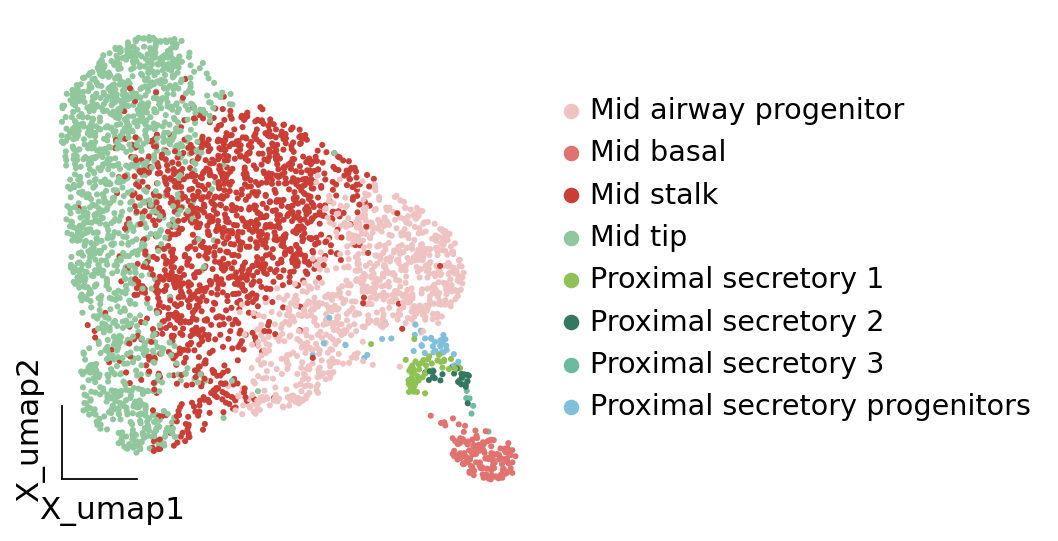

In [9]:
ov.pl.embedding(ad,
                basis="X_umap",
                color=['new_celltype'],title='',size=30,
                show=False, #legend_loc=None, add_outline=False, 
                frameon='small',legend_fontoutline=2,#ax=ax
)

Text(0.5, 1.0, 'Human Lung Epithelium\nscRNA-seq')

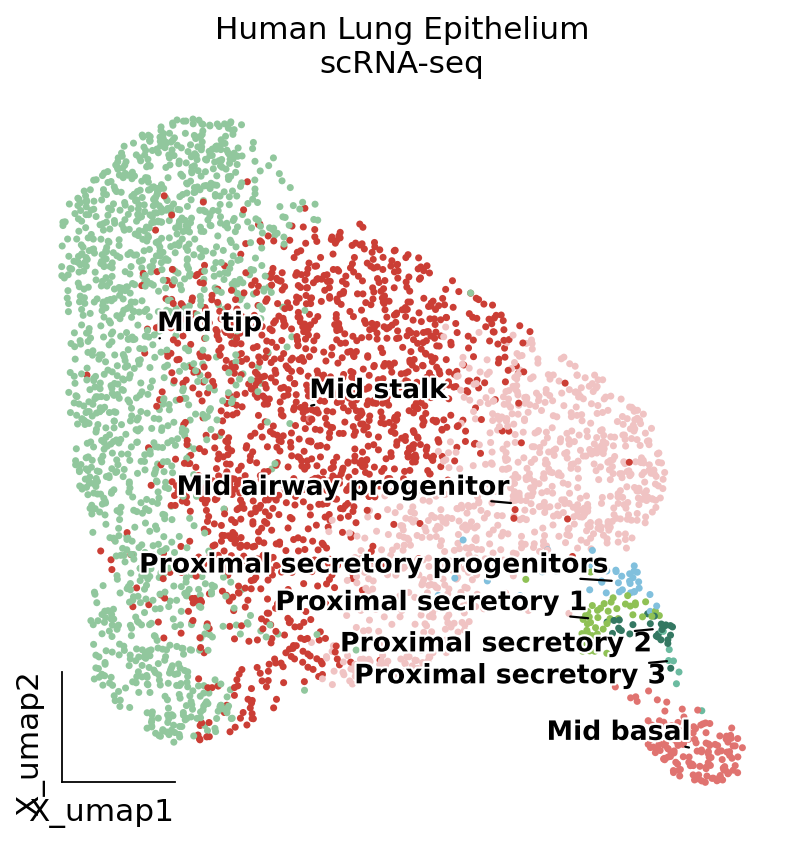

In [10]:
import matplotlib.pyplot as plt
from matplotlib import patheffects
fig, ax = plt.subplots(figsize=(6,6))
ov.pl.embedding(
    ad,
    basis="X_umap",
    color=['new_celltype'],title='',
    show=False,  
    frameon='small',
    size=40,
    palette=ov.pl.red_color[:3]+ov.pl.green_color[:2]+ov.pl.blue_color[:],
    ax=ax,
    legend_loc=None, add_outline=False, 
)

ov.pl.embedding_adjust(
    ad,
    basis="X_umap",
    groupby='new_celltype',
    ax=ax,
    adjust_kwargs=dict(arrowprops=dict(arrowstyle='-', color='black')),
    text_kwargs=dict(fontsize=12 ,weight='bold',
                     path_effects=[patheffects.withStroke(linewidth=2, foreground='w')] ),
)


plt.title('Human Lung Epithelium\nscRNA-seq', fontsize=14)
#plt.savefig(f'lungepi/Human Endometrium Epithelial.png',dpi=300,bbox_inches='tight')
#plt.savefig(f'lungepi/Human Endometrium Epithelial.pdf',dpi=300,bbox_inches='tight')



Text(0.5, 1.0, 'Pseudotime')

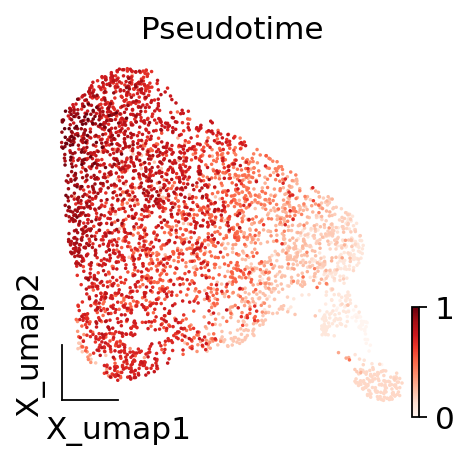

In [11]:
fig, ax = plt.subplots(figsize=(3,3))
ov.pl.embedding(
    ad,
    basis="X_umap",
    color=["pt_via"],title='',
    show=False,  
    frameon='small',
    size=10,
    cmap='Reds',
    #palette=ov.pl.red_color[:7]+ov.pl.green_color[:6]+ov.pl.blue_color[:],
    ax=ax,
    legend_loc=None, add_outline=False, 
)
ax.set_title('Pseudotime', fontsize=14)
#plt.savefig(f'lungepi/umap-pt-final.png',dpi=300,bbox_inches='tight')
#plt.savefig(f'lungepi/umap-pt-final.pdf',dpi=300,bbox_inches='tight')



Text(0.5, 1.0, 'Cell Stage Density')

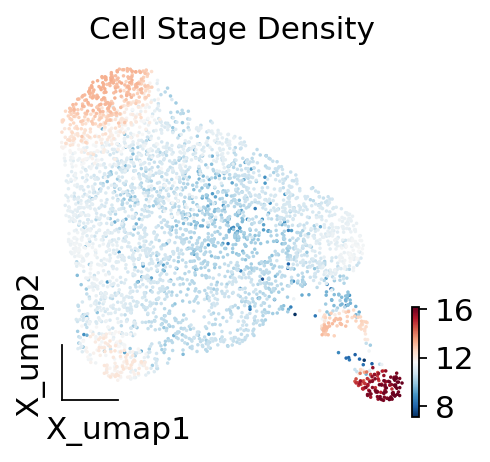

In [12]:
fig, ax = plt.subplots(figsize=(3,3))
ov.pl.embedding(
    ad,
    basis="X_umap",
    color=['mellon_log_density_lowd'],title='Cell Stage Density',
    show=False,  
    frameon='small',
    size=10,
    cmap='RdBu_r',
    #palette=ov.pl.red_color[:7]+ov.pl.green_color[:6]+ov.pl.blue_color[:],
    ax=ax,
    legend_loc=None, add_outline=False, 
)
ax.set_title('Cell Stage Density', fontsize=14)
#plt.savefig(f'lungepi/umap-mellon-33.png',dpi=300,bbox_inches='tight')
#plt.savefig(f'lungepi/umap-mellon-33.pdf',dpi=300,bbox_inches='tight')



  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--


 18% (2 of 11) |####                     | Elapsed Time: 0:00:00 ETA:  00:00:00
 36% (4 of 11) |#########                | Elapsed Time: 0:00:00 ETA:   0:00:00
 54% (6 of 11) |#############            | Elapsed Time: 0:00:00 ETA:   0:00:00
 72% (8 of 11) |##################       | Elapsed Time: 0:00:00 ETA:   0:00:00
 90% (10 of 11) |#####################   | Elapsed Time: 0:00:00 ETA:   0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


Text(0.5, 1.0, '')

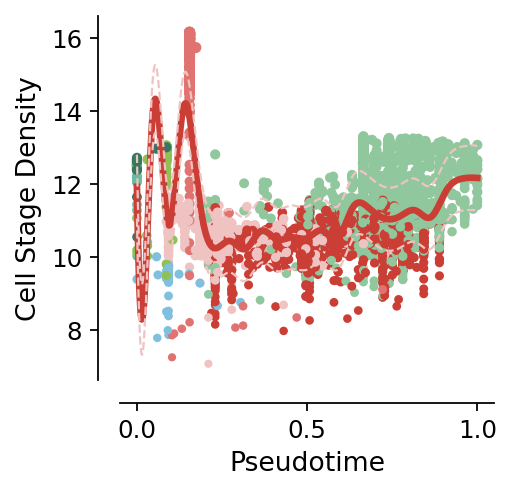

In [13]:
fig, ax = plt.subplots(figsize=(3,3))
#x=ad[ad.obs['leiden'].isin(visual_cluster),gene].to_df().values.reshape(-1)
x=ad.obs['pt_via'].values.reshape(-1)
y=ad.obs['mellon_log_density_lowd'].values.reshape(-1)

color_dict=dict(zip(ad.obs['new_celltype'].cat.categories,
                   ad.uns['new_celltype_colors']))

from pygam import LinearGAM

gam = LinearGAM(n_splines=25).gridsearch(x.reshape(x.shape[0],1), y)
XX = gam.generate_X_grid(term=0, n=500)

plt.plot(XX, gam.predict(XX), '-',linewidth=3,
        color=ov.pl.red_color[2])
plt.plot(XX, gam.prediction_intervals(XX, width=.65), 
         color=ov.pl.red_color[0], ls='--',linewidth=1,)

ax.scatter(x,y,c=[color_dict[i] for i in ad.obs['new_celltype'].tolist()],
           cmap='RdBu_r',s=y)

ax.spines['left'].set_position(('outward', 10))
ax.spines['bottom'].set_position(('outward', 10))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

ax.grid(False)


# 设置标签和标题
ax.set_xlabel('')
ax.set_ylabel('$R^2$', fontsize=13)
ax.set_title('', fontsize=13)
#ax.set_xticks(x + width)
ax.set_xticklabels(ax.get_xticklabels(),  fontsize=11,rotation=0)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=11)

plt.xlabel('Pseudotime',fontsize=12)
plt.ylabel('Cell Stage Density',fontsize=12)
plt.title('',fontsize=12)

#plt.savefig(f'lungepi/density-pt-leiden-33.png',dpi=300,bbox_inches='tight')
#plt.savefig(f'lungepi/density-pt-33.pdf',dpi=300,bbox_inches='tight')



In [16]:
cfg_obj3=ov.single.Fate(ad,pseudotime='pt_via')
cfg_obj3.model_init(test_size=0.65)
cfg_obj3.ATR(stop=500)

$MSE|RMSE|MAE|R^2$:0.017|0.13|0.1|0.74
coef_threshold:0.004337999504059553, r2:0.7258897736690422


,coef_threshold,r2
0,0.007768,0.011992
1,0.007689,0.363184
2,0.007560,0.486662
3,0.007466,0.497629
4,0.007248,0.499439
...,...,...
495,0.002997,0.663720
496,0.002996,0.663571
497,0.002996,0.663731
498,0.002995,0.663456


Text(0.5, 1.0, 'Lung-epi\nOmicFate')

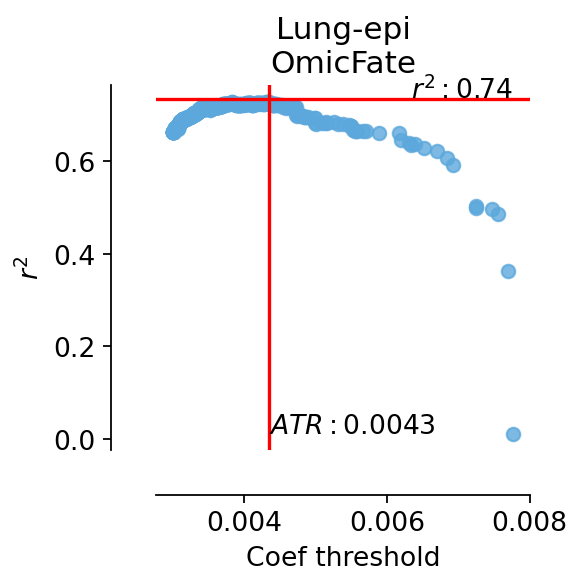

In [35]:
fig,ax=cfg_obj3.plot_filtering(color='#5ca8dc')
ax.set_title('Lung-epi\nOmicFate')

In [18]:
res=cfg_obj3.model_fit()

$MSE|RMSE|MAE|R^2$:0.017|0.13|0.1|0.72


(<Figure size 240x240 with 1 Axes>,
 <AxesSubplot: title={'center': 'Dimension: 22689'}, xlabel='Raw', ylabel='Predicted'>)

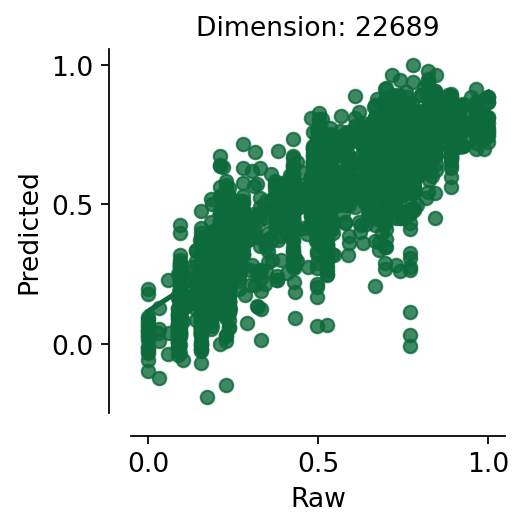

In [19]:
cfg_obj3.plot_fitting(type='raw')

Text(1.1, 0.5, 'rmse')

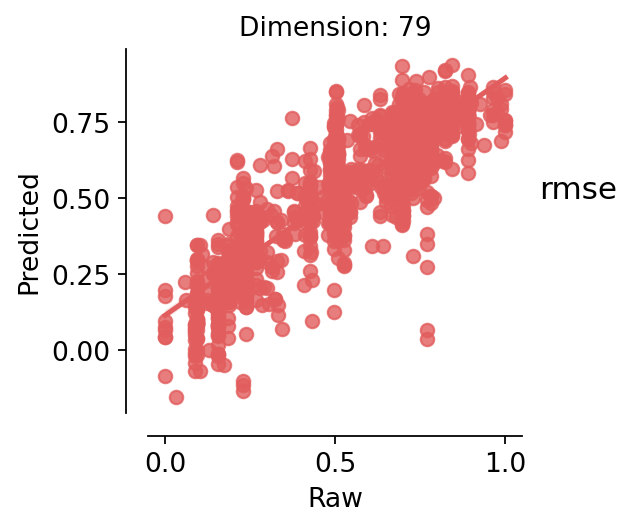

In [20]:
fig,ax=cfg_obj3.plot_fitting(type='filter',color='#e25d5d')
ax.text(1.1,0.5,'rmse')

In [21]:
var_name=cfg_obj3.filter_coef.index.tolist()

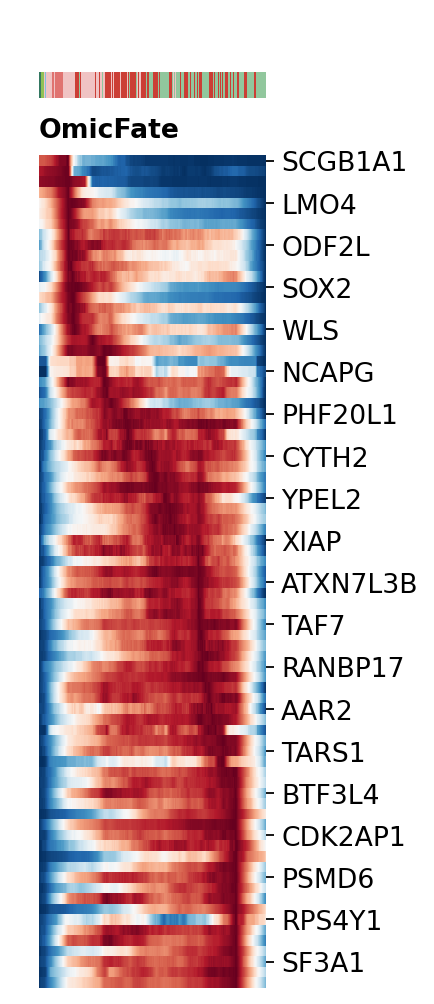

In [60]:
g=ov.utils.plot_heatmap(ad,var_names=var_name,
                  sortby='pt_via',col_color='new_celltype',
                 n_convolve=1000,figsize=(1,6),show=False,)

g.fig.set_size_inches(2, 8)
g.fig.suptitle('OmicFate',x=0.25,y=0.83,
               horizontalalignment='left',fontsize=12,fontweight='bold')
g.ax_heatmap.set_yticklabels(g.ax_heatmap.get_yticklabels(),fontsize=12)

plt.savefig(f'lungepi/heatmap_omicfate.png',dpi=300,bbox_inches='tight')
plt.savefig(f'lungepi/heatmap_omicfate.pdf',dpi=300,bbox_inches='tight')



In [46]:
ov.pp.leiden(ad,resolution=2)

running Leiden clustering
    finished: found 22 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:03)


<AxesSubplot: xlabel='X_umap1', ylabel='X_umap2'>

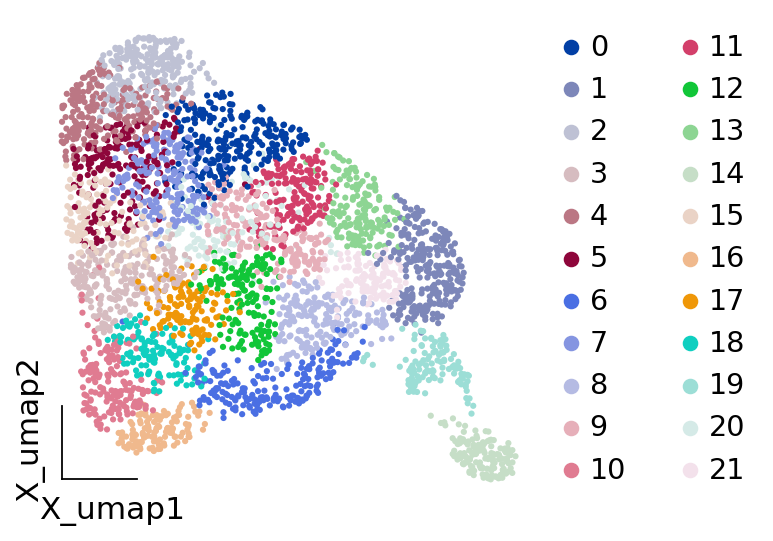

In [47]:
ov.pl.embedding(ad,
    basis="X_umap",
                  color=['leiden'],title='',#size=15,
                   show=False, #legend_loc=None, add_outline=False, 
                   frameon='small',legend_fontoutline=2,#ax=ax
                 )

Text(0.5, 1.0, 'Clusters')

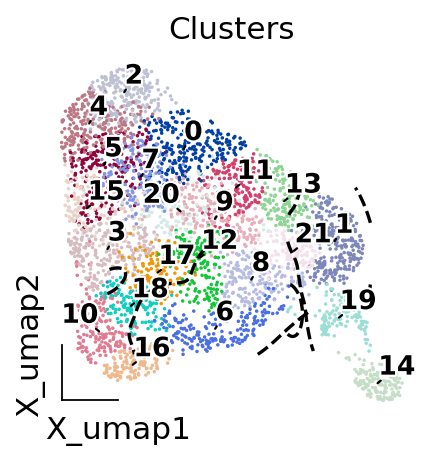

In [49]:
import matplotlib.pyplot as plt
from matplotlib import patheffects
fig, ax = plt.subplots(figsize=(3,3))
ov.pl.embedding(
    ad,
    basis="X_umap",
    color=['leiden'],title='',
    show=False,  
    frameon='small',
    size=10,
    #palette=ov.pl.red_color[:7]+ov.pl.green_color[:6]+ov.pl.blue_color[:],
    ax=ax,
    legend_loc=None, add_outline=False, 
)

ov.pl.embedding_adjust(
    ad,
    basis="X_umap",
    groupby='leiden',
    ax=ax,
    adjust_kwargs=dict(arrowprops=dict(arrowstyle='-', color='black')),
    text_kwargs=dict(fontsize=12 ,weight='bold',
                     path_effects=[patheffects.withStroke(linewidth=2, foreground='w')] ),
)

ov.pl.contour(ax=ax,adata=ad,
        basis="X_umap",
        groupby='leiden',clusters=['1','19'],
        contour_threshold=0.02,colors='#000000',linestyles='dashed')

ov.pl.contour(ax=ax,adata=ad,
        basis="X_umap",
        groupby='leiden',clusters=[
           '8','19'],
        contour_threshold=0.01,colors='#000000',linestyles='dashed')

plt.title('Clusters', fontsize=14)
#plt.savefig(f'lungepi/umap-leiden.png',dpi=300,bbox_inches='tight')
#plt.savefig(f'lungepi/umap-leiden.pdf',dpi=300,bbox_inches='tight')



In [50]:
cfg_obj3.low_density(pca_key='X_pca')

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)


INFO:jax._src.xla_bridge:Unable to initialize backend 'cuda': module 'jaxlib.xla_extension' has no attribute 'GpuAllocatorConfig'
INFO:jax._src.xla_bridge:Unable to initialize backend 'rocm': module 'jaxlib.xla_extension' has no attribute 'GpuAllocatorConfig'
INFO:jax._src.xla_bridge:Unable to initialize backend 'tpu': INVALID_ARGUMENT: TpuPlatform is not available.


[2024-07-28 22:10:20,798] [INFO    ] Computing nearest neighbor distances.
[2024-07-28 22:10:20,865] [WARNING ] Using EXPERIMENTAL fractal dimensionality selection.


[2024-07-28 22:10:22,453] [INFO    ] Using d=2.071479672279672.
[2024-07-28 22:10:22,701] [INFO    ] Using covariance function Matern52(ls=0.04546985877995695).
[2024-07-28 22:10:22,706] [INFO    ] Doing full-rank Cholesky decomposition for 3,842 samples.
[2024-07-28 22:10:24,393] [INFO    ] Using rank 3,842 covariance representation.
[2024-07-28 22:10:25,123] [INFO    ] Running inference using L-BFGS-B.


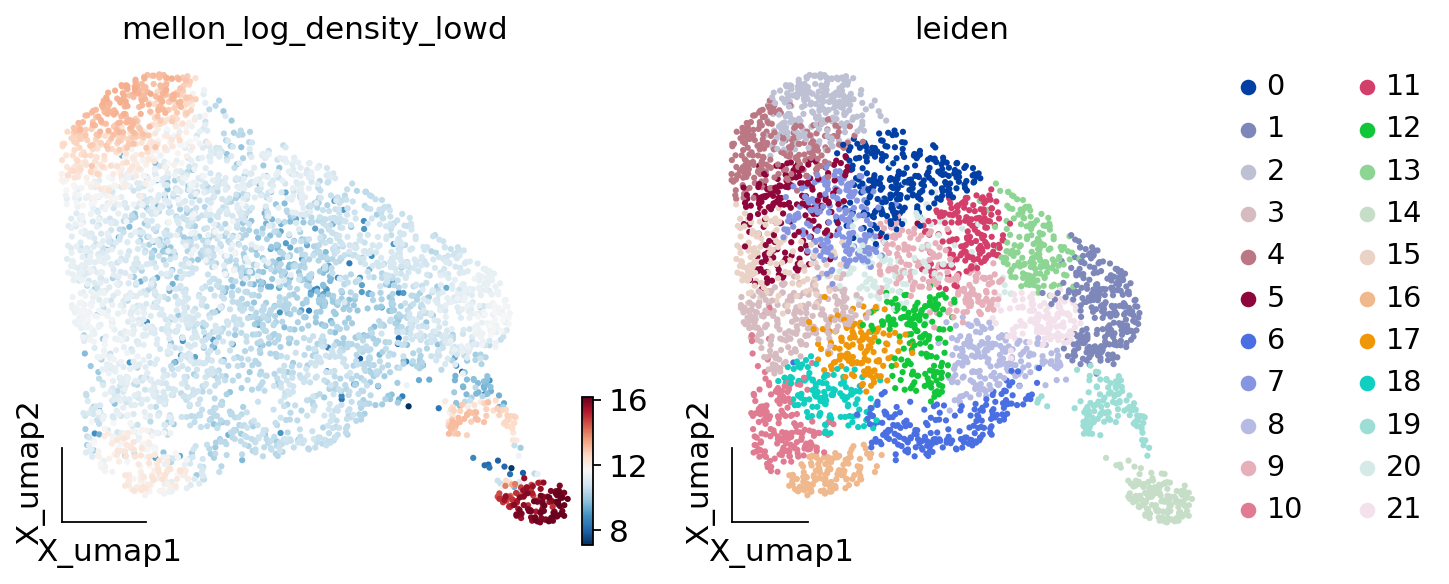

In [51]:
ov.pl.embedding(ad,
                basis='X_umap',
                color=['mellon_log_density_lowd','leiden'],
                frameon='small',
               cmap='RdBu_r')

## Airway Progenitors

In [14]:
ad.layers['counts'] = ad.X.copy()

In [22]:
cfg_obj3.lineage_score(cluster_key='leiden',lineage=['6','1','8','19'],
                      expression_key='counts')

Run low_density first


100%|██████████| 3842/3842 [00:25<00:00, 150.30it/s]


Calculating lineage score
The lineage score stored in adata.var['change_scores_lineage']


In [23]:
scores = ad.var["change_scores_lineage"]
scores.sort_values(ascending=False)

SCGB3A2            2.304630e-07
SCGB3A1            2.046462e-07
SCGB1A1            1.061295e-07
SFTPB              1.012541e-07
H4C3               9.811661e-08
                       ...     
ENSG00000266076    0.000000e+00
ENSG00000237174    0.000000e+00
LOC101927293       0.000000e+00
ENSG00000224984    0.000000e+00
ENSG00000277475    0.000000e+00
Name: change_scores_lineage, Length: 22689, dtype: float64

In [24]:
od_genes=scores.loc[cfg_obj3.filter_coef.index].sort_values(ascending=False)[:20]
od_genes

SCGB3A2     2.304630e-07
SCGB3A1     2.046462e-07
SCGB1A1     1.061295e-07
H4C3        9.811661e-08
RPS4Y1      7.266621e-08
TUBA1C      5.843916e-08
SERPINF1    4.980401e-08
CXCL17      4.581253e-08
SOCS3       4.301704e-08
SOX2        4.116276e-08
TPM1        3.931750e-08
ANXA3       3.868903e-08
SFTPC       3.597653e-08
TPPP3       3.439435e-08
PLK1        3.255835e-08
LMO4        3.255187e-08
TYMS        3.191713e-08
COL6A1      2.964999e-08
PCSK1N      2.797710e-08
H1-3        2.741032e-08
Name: change_scores_lineage, dtype: float64

In [25]:
del ad.raw

Text(0.5, 1.0, 'Airway Progenitors\nscRNA-seq')

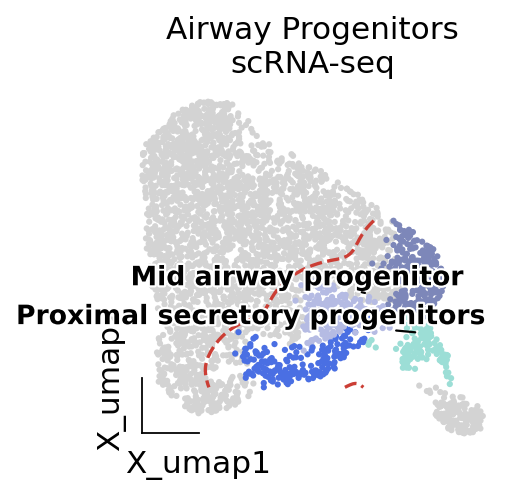

In [34]:
import matplotlib.pyplot as plt
from matplotlib import patheffects
fig, ax = plt.subplots(figsize=(3,3))

visual_cluster=['6','1','8','19']
ad.obs['visual']=ad.obs['leiden'].copy()
ad.obs.loc[~ad.obs['leiden'].isin(visual_cluster),'visual']=None
ov.utils.embedding(ad,
                basis='X_umap',frameon='small',
                color=['visual'],
                legend_loc=None,
                #palette=ov.utils.blue_color+ov.utils.orange_color+ov.utils.red_color+ov.utils.green_color,
                show=False,
                  ax=ax)

ov.pl.embedding_adjust(
    ad,
    basis="X_umap",
    groupby='new_celltype',
    exclude=tuple(set(ad.obs['new_celltype'].cat.categories)-set(['Mid airway progenitor',
       'Proximal secretory progenitors'])),  
    ax=ax,
    adjust_kwargs=dict(arrowprops=dict(arrowstyle='-', color='black')),
    text_kwargs=dict(fontsize=12 ,weight='bold',
                     path_effects=[patheffects.withStroke(linewidth=2, foreground='w')] ),
)

ov.pl.contour(ax=ax,adata=ad,
        basis="X_umap",
        groupby='leiden',clusters=visual_cluster,
        contour_threshold=0.02,colors=ov.pl.red_color[2],linestyles='dashed')

plt.title('Airway Progenitors\nscRNA-seq', fontsize=14)
#plt.savefig(f'lungepi/umap-lineage-pres.png',dpi=300,bbox_inches='tight')
#plt.savefig(f'lungepi/umap-lineage-pres.pdf',dpi=300,bbox_inches='tight')


[Text(1, 0.5, 'SCGB1A1'),
 Text(1, 1.5, 'CXCL17'),
 Text(1, 2.5, 'SCGB3A1'),
 Text(1, 3.5, 'RPS4Y1'),
 Text(1, 4.5, 'SOCS3'),
 Text(1, 5.5, 'SCGB3A2'),
 Text(1, 6.5, 'SERPINF1'),
 Text(1, 7.5, 'H4C3'),
 Text(1, 8.5, 'SOX2'),
 Text(1, 9.5, 'TUBA1C')]

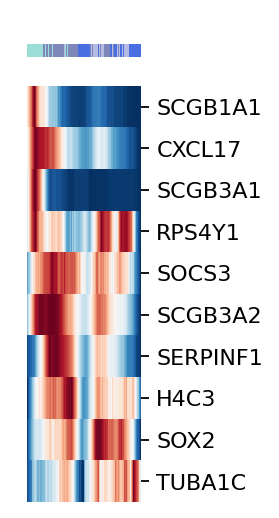

In [28]:
import matplotlib.pyplot as plt
g=ov.utils.plot_heatmap(ad[ad.obs['leiden'].isin(visual_cluster)],
                        var_names=scores.loc[cfg_obj3.filter_coef.index].sort_values(ascending=False)[:10].index.tolist(),
                  sortby='pt_via',col_color='leiden',yticklabels=True,
                 n_convolve=100,figsize=(1,6),show=False)

g.fig.set_size_inches(1, 4)
g.ax_heatmap.set_yticklabels(g.ax_heatmap.get_yticklabels(),fontsize=10)

#plt.savefig(f'lungepi/heatmap-lineage-pres-leiden-24.png',dpi=300,bbox_inches='tight')
#plt.savefig(f'lungepi/heatmap-lineage-pres-leiden-24.pdf',dpi=300,bbox_inches='tight')

[Text(1, 0.5, 'SCGB3A1'),
 Text(1, 1.5, 'SCGB3A2'),
 Text(1, 2.5, 'CXCL17'),
 Text(1, 3.5, 'SOCS3'),
 Text(1, 4.5, 'SERPINF1'),
 Text(1, 5.5, 'SCGB1A1'),
 Text(1, 6.5, 'H4C3'),
 Text(1, 7.5, 'SOX2'),
 Text(1, 8.5, 'RPS4Y1'),
 Text(1, 9.5, 'TUBA1C')]

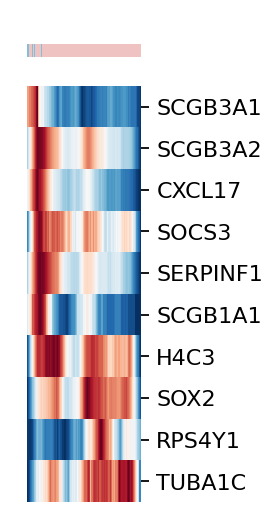

In [29]:
import matplotlib.pyplot as plt
g=ov.utils.plot_heatmap(ad[ad.obs['new_celltype'].isin(['Mid airway progenitor',
       'Proximal secretory progenitors'])],
                        var_names=scores.loc[cfg_obj3.filter_coef.index].sort_values(ascending=False)[:10].index.tolist(),
                  sortby='pt_via',col_color='new_celltype',yticklabels=True,
                 n_convolve=150,figsize=(1,6),show=False)

g.fig.set_size_inches(1, 4)
g.ax_heatmap.set_yticklabels(g.ax_heatmap.get_yticklabels(),fontsize=10)

#plt.savefig(f'lungepi/heatmap-lineage-pres-ct-24.png',dpi=300,bbox_inches='tight')
#plt.savefig(f'lungepi/heatmap-lineage-pres-ct-24.pdf',dpi=300,bbox_inches='tight')

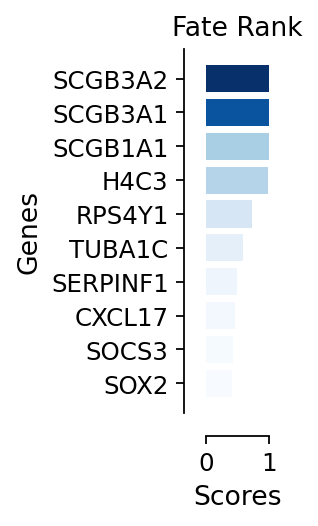

In [30]:
# 创建横向柱状图
import matplotlib.cm as cm
fig, ax = plt.subplots(figsize=(0.5, 3))

od_genes=scores.loc[cfg_obj3.filter_coef.index].sort_values(ascending=False)[:10]

norm = plt.Normalize(min(od_genes.values), max(od_genes.values))
colors = cm.Blues(norm(od_genes.values))

plt.barh(od_genes.index, od_genes.values, color=colors)

ax.spines['left'].set_position(('outward', 10))
ax.spines['bottom'].set_position(('outward', 10))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

ax.grid(False)

# 设置标签和标题
ax.set_xlabel('')
ax.set_ylabel('$R^2$', fontsize=13)
ax.set_title('', fontsize=13)
ax.set_xlim(0,1e-07)
#ax.set_xticks(x + width)
ax.set_xticklabels(ax.get_xticklabels(),  fontsize=11,rotation=0)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=11)

plt.xlabel('Scores',fontsize=12)
plt.ylabel('Genes',fontsize=12)
plt.title('Fate Rank',fontsize=12)
plt.gca().invert_yaxis()  # 反转y轴使得最高分数在顶部

#plt.savefig(f'lungepi/fr-lineage-pres-33.png',dpi=300,bbox_inches='tight')
#plt.savefig(f'lungepi/fr-lineage-pres-33.pdf',dpi=300,bbox_inches='tight')


In [31]:
import seaborn as sns

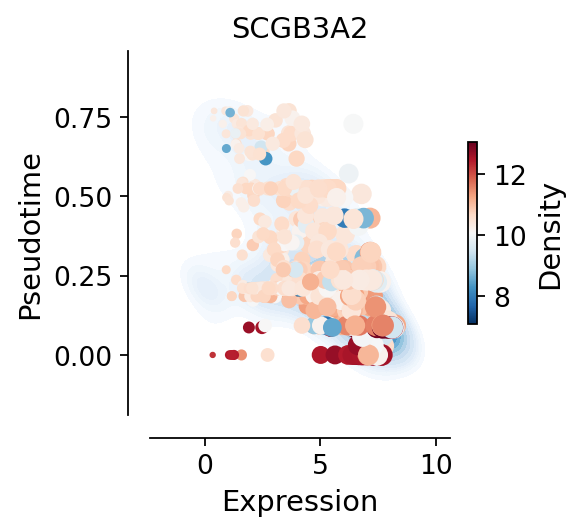

In [32]:
fig, ax = plt.subplots(figsize=(3,3))

gene='SCGB3A2'
visual_cluster=['6','1','8','19']

x=ad[ad.obs['leiden'].isin(visual_cluster),gene].to_df().values.reshape(-1)
y=ad.obs.loc[ad.obs['leiden'].isin(visual_cluster),'pt_via'].values.reshape(-1)
z=ad.obs.loc[ad.obs['leiden'].isin(visual_cluster),'mellon_log_density_lowd'].values.reshape(-1)

sns.kdeplot(
        x=x, y=y,
        fill=True,
        cmap='Blues',
        #clip=(-5, 5), cut=10,
        thresh=0.1, levels=15,
        ax=ax,#cbar=True,
    )
scatter=ax.scatter(x,y,
           c=z, s=x*10,
           cmap='RdBu_r',
          )

ax.spines['left'].set_position(('outward', 10))
ax.spines['bottom'].set_position(('outward', 10))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

ax.grid(False)

plt.xlabel('Expression',fontsize=13)
plt.ylabel('Pseudotime',fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.title(gene,fontsize=13)
cbar = plt.colorbar(scatter, ax=ax,shrink=0.5)
cbar.set_label('Density', fontsize=13)
cbar.ax.tick_params(labelsize=12)

plt.savefig(f'lungepi/density-lineage-pres-{gene}.png',dpi=300,bbox_inches='tight')
plt.savefig(f'lungepi/density-lineage-pres-{gene}.pdf',dpi=300,bbox_inches='tight')

#cbar.set_ticklabels(cbar.get_ticklabels(),fontsize=12)

<AxesSubplot: title={'center': 'SCGB3A2'}, xlabel='X_umap1', ylabel='X_umap2'>

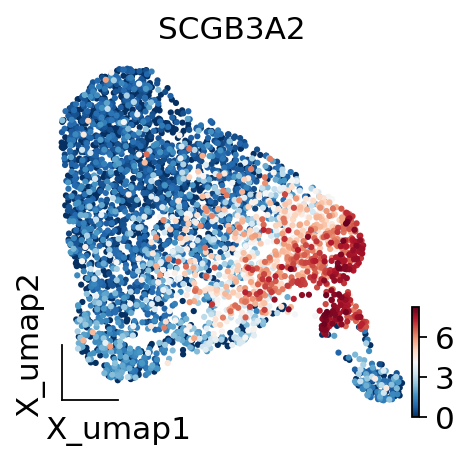

In [33]:
fig, ax = plt.subplots(figsize=(3,3))

#visual_cluster=['15','12']
#ad.obs['visual']=ad.obs['leiden'].copy()
#ad.obs.loc[~ad.obs['leiden'].isin(visual_cluster),'visual']=None
ov.utils.embedding(ad,
                basis='X_umap',frameon='small',
                color=[gene],
                legend_loc=None,
                #palette=ov.utils.blue_color+ov.utils.orange_color+ov.utils.red_color+ov.utils.green_color,
                show=False,
                ax=ax)
plt.savefig(f'lungepi/umap-lineage-B-{gene}.png',dpi=300,bbox_inches='tight')
plt.savefig(f'lungepi/umap-lineage-B-{gene}.pdf',dpi=300,bbox_inches='tight')
